## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      507 non-null    float64
 1   ZN        507 non-null    float64
 2   INDUS     507 non-null    float64
 3   CHAS      507 non-null    int64  
 4   NOX       507 non-null    float64
 5   RM        501 non-null    float64
 6   AGE       507 non-null    float64
 7   DIS       507 non-null    float64
 8   RAD       507 non-null    int64  
 9   TAX       507 non-null    int64  
 10  PTRATIO   507 non-null    float64
 11  B         507 non-null    float64
 12  LSTAT     507 non-null    float64
 13  MEDV      507 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.6 KB


In [5]:
housing['CRIM'].value_counts()

CRIM
0.04741     2
14.33370    2
0.01501     2
19.60910    1
18.49820    1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.08221     1
Name: count, Length: 504, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,507.000000,507.000000,507.000000,507.000000,507.000000,501.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,3.606490,11.341223,11.138343,0.069034,0.554731,6.286114,68.599014,3.792498,9.532544,407.970414,18.460552,356.753373,12.643649,22.511834
std,8.594501,23.304861,6.853661,0.253762,0.115766,0.704736,28.126273,2.104408,8.706934,168.477585,2.165755,91.222103,7.137150,9.200138
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081930,0.000000,5.190000,0.000000,0.449000,5.887000,45.050000,2.100350,4.000000,279.000000,17.400000,375.425000,6.970000,16.900000
50%,0.253870,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.450000,11.340000,21.200000
75%,3.675945,12.500000,18.100000,0.000000,0.624000,6.625000,94.050000,5.164950,24.000000,666.000000,20.200000,396.235000,16.950000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# For plotting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

# Train-Test Splitting

In [9]:

# For learning purpose
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      102 non-null    float64
 1   ZN        102 non-null    float64
 2   INDUS     102 non-null    float64
 3   CHAS      102 non-null    int64  
 4   NOX       102 non-null    float64
 5   RM        98 non-null     float64
 6   AGE       102 non-null    float64
 7   DIS       102 non-null    float64
 8   RAD       102 non-null    int64  
 9   TAX       102 non-null    int64  
 10  PTRATIO   102 non-null    float64
 11  B         102 non-null    float64
 12  LSTAT     102 non-null    float64
 13  MEDV      102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [15]:
housing = strat_test_set.copy()

# Looking for Correlations

In [16]:
corr_matrix = housing.corr()

In [17]:
corr_matrix['MEDV'].sort_values(ascending= False)

MEDV        1.000000
RM          0.775625
ZN          0.452463
DIS         0.298870
B           0.166552
CHAS        0.046079
CRIM       -0.383272
RAD        -0.410491
AGE        -0.443734
NOX        -0.453787
TAX        -0.532383
INDUS      -0.532626
PTRATIO    -0.573063
LSTAT      -0.728548
Name: MEDV, dtype: float64

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

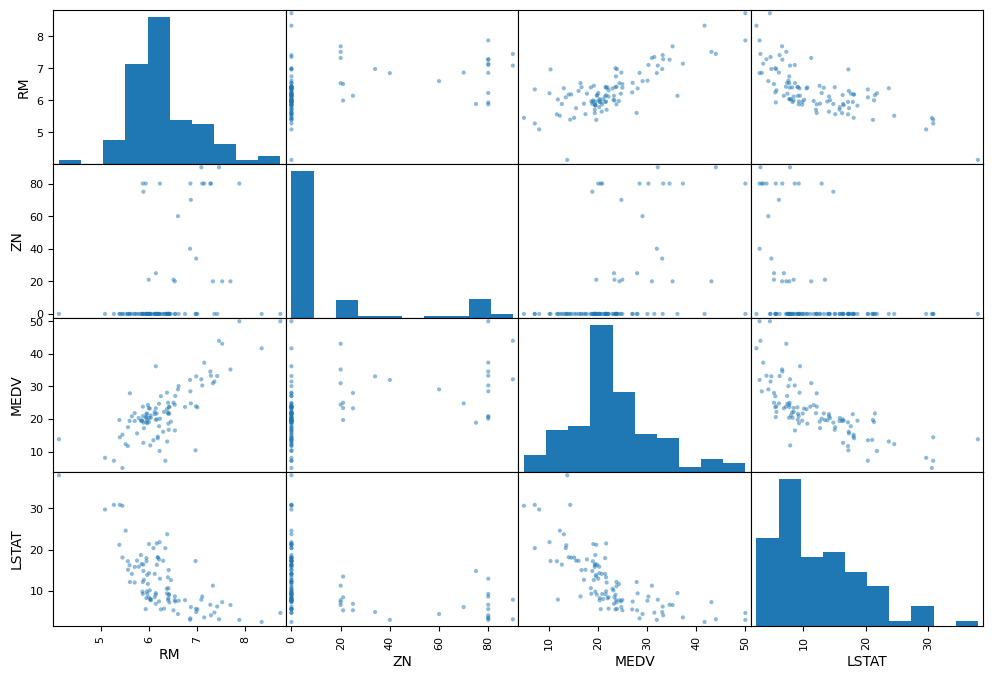

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["RM","ZN","MEDV","LSTAT" ]
scatter_matrix(housing[attributes],figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

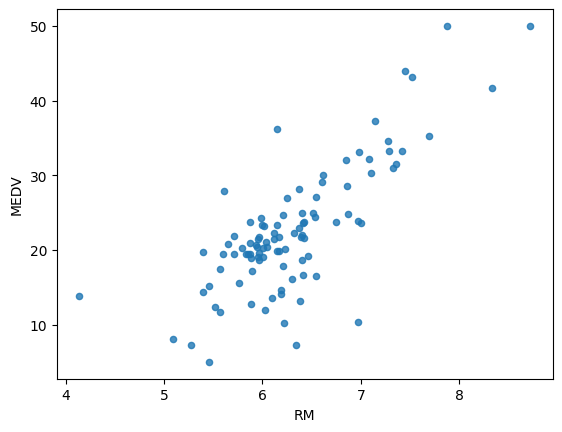

In [19]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha = 0.8)

# Trying out Attribute combination

In [20]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5,64.525994
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1,46.388637
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0,43.307704
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4,43.156140


In [22]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending= False)

MEDV        1.000000
RM          0.775625
ZN          0.452463
DIS         0.298870
B           0.166552
CHAS        0.046079
CRIM       -0.383272
RAD        -0.410491
AGE        -0.443734
NOX        -0.453787
TAX        -0.532383
INDUS      -0.532626
PTRATIO    -0.573063
TAXRM      -0.618378
LSTAT      -0.728548
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

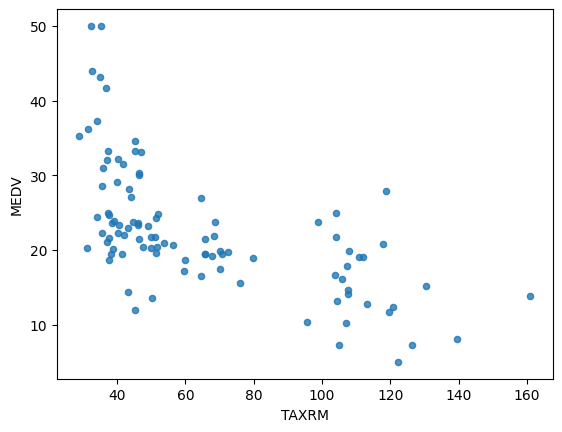

In [23]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha = 0.8)

In [24]:
housing = strat_train_set.drop("MEDV", axis =1)
housing_labels = strat_train_set["MEDV"].copy()

#  Missing Attributes

In [25]:
# To take care of the missing attrbutes, you have three options:
#     1. get rid of missing data
#     2. get rid of the whole attribute
#     3. set the value to to some value (0, mean, median)

In [26]:
a = housing.dropna(subset=["RM"]) #option 1
a.shape
#note that the original housing data will remain unchanged

(403, 13)

In [27]:
housing.drop("RM", axis = 1).shape #option 2

(405, 12)

In [28]:
median = housing["RM"].median() #compute median for option 3

In [29]:
median

6.209

In [30]:
housing["RM"].fillna(median) #option 3

104    6.167
240    6.897
174    5.859
146    5.628
110    6.195
       ...  
142    5.403
114    6.254
178    6.860
321    6.376
234    6.726
Name: RM, Length: 405, dtype: float64

In [31]:
housing.shape

(405, 13)

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.8392e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.2090e+00, 7.7700e+01, 3.1323e+00, 5.0000e+00, 3.3700e+02,
       1.9000e+01, 3.9095e+02, 1.1480e+01])

In [34]:
X = imputer.transform(housing)

In [35]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [36]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,3.603428,10.809877,11.322593,0.069136,0.558212,6.280617,68.683951,3.748081,9.762963,411.886420,18.479753,353.483975,12.734222
std,8.089971,22.129757,6.828999,0.253999,0.116804,0.707646,28.270280,2.094706,8.755372,168.423167,2.130503,95.940129,7.168212
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086640,0.000000,5.190000,0.000000,0.453000,5.884000,44.400000,2.045900,4.000000,284.000000,17.400000,374.430000,6.900000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.700000,3.132300,5.000000,337.000000,19.000000,390.950000,11.480000
75%,3.696950,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,16.960000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# scikit-learn Design

Primarily, 3 types of objects

1. Estimators - It estimates some parameter based on a dataset. Eg. imputer
It has a fit method and tranform method.
Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and return output based on the learning from fit(), It has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression medel is an ex. of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictors.

# Feature Scaling

# Creating a pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    #.....add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [38]:
housing_num_tr = my_pipline.fit_transform(housing)

In [39]:
housing_num_tr.shape

(405, 13)

# Selecting a desired model for Indus Real Estates

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [41]:
some_data = housing.iloc[:5]

In [42]:
some_labels = housing_labels.iloc[:5]

In [43]:
prepared_data = my_pipline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([19.999, 23.853, 21.86 , 15.434, 21.597])

In [45]:
list(some_labels)

[20.1, 22.0, 22.6, 15.6, 21.7]

# Evaluating the model

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [47]:
rmse 

1.2578676607067418

# Using better evaluation technique -  Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring ="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [49]:
rmse_scores

array([3.13983337, 3.00317152, 4.77327281, 3.00503647, 2.74150737,
       2.63007906, 3.78957937, 3.21027711, 4.3783491 , 2.58651011])

In [50]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [51]:
print_scores(rmse_scores)

Scores: [3.13983337 3.00317152 4.77327281 3.00503647 2.74150737 2.63007906
 3.78957937 3.21027711 4.3783491  2.58651011]
Mean: 3.325761628015305
Standard deviation: 0.7102824077815206


# Saving the model

In [52]:
from joblib import dump, load
dump(model, 'Indus.joblib') 

['Indus.joblib']

# Testing the model on the test data

In [56]:
X_test = strat_test_set.drop("MEDV", axis =1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.797 12.022 26.125 21.833 19.224 14.609 20.502 14.206 32.218 41.697
 19.3   12.265 23.494 30.545 19.378 11.34  31.76  14.04  23.535 18.004
 20.012 18.424 19.321 21.915 18.011 30.731 16.42  32.426  8.885 33.899
 22.261 15.457 22.479 10.988 20.932 11.156 44.175 24.29  23.441 42.557
 23.889 30.16  20.642 20.661 19.017 33.268 44.52  19.848 13.912 21.917
 20.165 15.    21.325 14.885 25.189 33.547 42.028 28.838 19.829 20.256
 47.443  9.871 19.091 25.852 14.371 33.172 19.726 17.132 19.543 33.974
 25.804 22.493 21.389 22.476 34.348 11.12  16.091 19.849 20.338 21.102
 22.03  15.331 14.53  22.358 21.256 30.273 14.331 21.662 30.737 23.424
 18.058 24.555  7.532 25.997 19.499 29.419 19.609 31.578 14.031 26.17
 20.587 20.174] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 19.7, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 16.1, 32.0, 7.2, 34.6, 20.1, 15.2, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [55]:
final_rmse

3.014596142431152

In [59]:
prepared_data[0]

array([-0.4286928 , -0.48908114, -0.4050388 , -0.27252625, -0.32754745,
       -0.16075519,  0.75494174, -0.63432391, -0.54467747, -0.16577833,
        1.13740278,  0.40915639, -0.05646069])

# Using the model

In [ ]:
from joblib import dump, load
import numpy as np
model = load('Indus.joblib')
features = np.array([[-0.4286928 , -0.48908114, -0.4050388 , -0.87252625, -0.32754745,
       -0.16075519,  0.75494174, -0.63432391, -0.54467747, -0.26577833,
        1.13740278,  0.00915639, -0.05646069]])
model.predict(features)